In [52]:
import numpy as np 

class DKL:
    def __init__(self,o,f,convert_1d_2d=False):
        """
        o and f are 2-D vectors [num_samples, num_classes]
        
        If o and f are forecasting binary events (n=2), then
        
        o[0,:] = [1-o[0], o[0]]
        """
        if convert_1d_2d:
            self.f = self.generate_2d_twoclass(f)
            self.o = self.generate_2d_twoclass(o)
        else:
            self.f = f 
            self.o = o 
        self.ns = np.unique(self.o, axis=0)
        self.n = len(self.ns)
        self.ks = np.unique(self.f, axis=0)
        self.o_bar = np.mean(self.o,axis=1)
        self.K = self.ks.shape[0]
        # Multiple by classes? self.n
        self.N = self.f.shape[0]
        # assert self.f.shape[1] == self.n
        print(f"{self.n=}")
        print(f"{self.ks=}")
        print(f"{self.o_bar=}")
        print(f"{self.K=}")
        print(f"{self.N=}")
        print(f"{self.f=}")
        print(f"{self.o=}")
        
    @staticmethod
    def generate_2d_twoclass(series_1d):
        data = np.zeros([len(series_1d),2])
        data = np.array([1-series_1d, series_1d])
        return data 
    
    @staticmethod
    def __compute_dkl(p,q,nclass):
        """
        p and q must be 2D [num_samples, num_classes]
        """
        print(p.shape,q.shape)
        dkl_score = 0
        for i in np.arange(nclass):
            dkl_score += p[:,i] * np.log2(p[:,i]/q[:,i])
        # dkl_score is 1D of all times
        return np.mean(dkl_score)
    
    def compute_rel(self):
        rel_score = 0
        for k in self.ks:
            fk = self.f[self.f == k]
            ok = self.o[self.f == k]
            ok_bar = np.mean(ok,axis=1)
            nk = len(fk)
            print(fk, ok, ok_bar, nk)
            rel_score += nk * self.__compute_dkl(ok_bar,fk,self.n)
        return rel_score / self.N
    
    def compute_res(self):
        res_score = 0
        for k in self.ks:
            fk = self.f[self.f == k]
            ok = self.o[self.f == k]
            ok_bar = np.mean(ok)
            nk = len(fk)
            res_score += nk * self.__compute_dkl(ok_bar,self.o_bar,self.n)
        return res_score / self.N 
    
    def compute_unc(self):
        unc_score = 0
        for i in self.ns:
            unc_score += self.o_bar[i] * np.log2(self.o_bar[i])
        return -unc_score 
    
    def compute_dkl(self,from_components=False):
        if from_components:
            UNC = self.compute_unc() 
            RES = self.compute_res()
            REL = self.compute_rel()
            return UNC - RES + REL 
        return self.__compute_dkl(self.o, self.f, self.n)
            
    @classmethod
    def compute_info_gain(cls, o, f1, f2, nclass, from_components=False):
        DKL1 = cls.__compute_dkl(o, f1, nclass)[1]
        DKL2 = cls.__compute_dkl(o, f2, nclass)[1]
        return DKL1 - DKL2

    def compute_bs(self):
        return np.mean((self.o-self.f)**2)

    def compute_bss(self):
        bs = self.compute_bs()
        bs_unc = self.o_bar * (1-self.o_bar)
        return 1 - (bs/bs_unc)

    def compute_skill_score(self, return_components=True):
        U = self.compute_unc()
        R = self.compute_rel()
        D = self.compute_res()
        D_ss = D/U
        R_ss = R/U
        SS = D_ss - R_ss
        if return_components:
            return SS, D_ss, R_ss
        return SS

    def compute_info_gain_over_climo(self):
        R = self.compute_rel()
        D = self.compute_res()

        # Info gain over using the base-rate for forecasts
        return (D - R)
        
            
            

In [53]:
def generate_time_series(seed=42,num_samples=100):
    # np.random.seed(seed)
    rng = np.random.default_rng(seed=seed)

    
    # Generate the 'o' time series with ~5% frequency of '1'
    # o = np.random.choice([0, 1], size=num_samples, p=[0.9, 0.1])
    o = rng.choice([0, 1], size=num_samples, p=[0.8, 0.2])
    
    # Initialize 'f' as an empty array
    f = np.zeros(num_samples)
    
    for i in range(num_samples):
        if o[i] == 1:
            # Generate a high probability value between 0.50 and 0.99

            f[i] = rng.choice(np.arange(0.80, 0.995, 0.02))
            # f[i] = np.random.choice(np.arange(0.70, 1.00, 0.01))
        else:
            # Generate a low probability value between 0.01 and 0.49
            # f[i] = np.random.choice(np.arange(0.01, 0.20, 0.01))
            f[i] = rng.choice(np.arange(0.02, 0.40, 0.02))
            
    return o, f

# print("o:", o)
# print("f:", f)


self.n=2
self.ks=array([[0.14, 0.36, 0.88, 0.28, 0.18, 0.84, 0.3 , 0.38, 0.12, 0.3 , 0.1 ,
        0.94, 0.3 , 0.88, 0.3 , 0.12, 0.04, 0.04, 0.88, 0.36, 0.06, 0.18,
        0.94, 0.84, 0.28, 0.12, 0.32, 0.24, 0.22, 0.08, 0.18, 0.96, 0.02,
        0.3 , 0.2 , 0.28, 0.26, 0.18, 0.12, 0.24, 0.06, 0.9 , 0.04, 0.26,
        0.92, 0.8 , 0.3 , 0.16, 0.3 , 0.02, 0.08, 0.2 , 0.08, 0.14, 0.26,
        0.06, 0.26, 0.04, 0.08, 0.24, 0.32, 0.08, 0.12, 0.36, 0.38, 0.24,
        0.18, 0.14, 0.24, 0.24, 0.12, 0.02, 0.82, 0.38, 0.16, 0.2 , 0.18,
        0.3 , 0.04, 0.04, 0.12, 0.2 , 0.92, 0.2 , 0.18, 0.36, 0.08, 0.22,
        0.22, 0.18, 0.32, 0.12, 0.38, 0.14, 0.22, 0.2 , 0.34, 0.18, 0.12,
        0.8 ],
       [0.86, 0.64, 0.12, 0.72, 0.82, 0.16, 0.7 , 0.62, 0.88, 0.7 , 0.9 ,
        0.06, 0.7 , 0.12, 0.7 , 0.88, 0.96, 0.96, 0.12, 0.64, 0.94, 0.82,
        0.06, 0.16, 0.72, 0.88, 0.68, 0.76, 0.78, 0.92, 0.82, 0.04, 0.98,
        0.7 , 0.8 , 0.72, 0.74, 0.82, 0.88, 0.76, 0.94, 0.1 , 0.96, 0.74,
      

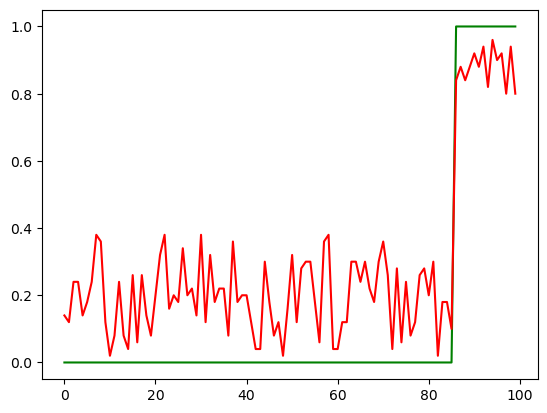

In [54]:
from matplotlib import pyplot as plt

o, f = generate_time_series()
dkl_ = DKL(o,f,convert_1d_2d=True)

fig,ax = plt.subplots(1)
o_copy = o.copy()
f_copy = f.copy()
ind = np.argsort(o_copy)
o_sort = o_copy[ind]
f_sort = f_copy[ind]
ax.plot(o_sort,color="green")
ax.plot(f_sort,color="red")

In [55]:
print(dkl_.compute_unc())
print(dkl_.compute_rel())
print(dkl_.compute_res())
print(dkl_.compute_dkl())

[0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881
 0.58423881 0.58423881 0.58423881 0.58423881 0.58423881 0.5842

AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
bs = dkl_.compute_bs()
bss = dkl_.compute_bss()
print(f"{bs=} \n {bss=}")

SS, D_ss, R_ss = dkl_.compute_skill_score(return_components=True)
print(f"{SS=} \n {D_ss=} \n {R_ss=}")

ig = dkl_.compute_info_gain_over_climo()
print(f"{ig=}")    